imports

In [32]:
import pandas as pd
import seaborn as sns


config

In [34]:
config_datasheet = r'./results/preprocessed.xlsx'

import df

In [35]:
raw = pd.read_excel(config_datasheet)
df = pd.DataFrame(raw)


remove outliers

#split dataframes into dataframes for the 2*2 related factors
df_BU_R = df.loc[(df["ProgrammingStyle"]=="R")
df_BU_I = df.loc[(df["ProgrammingStyle"]=="I") 
df_TD_R = df.loc[(df["ProgrammingStyle"]=="R") 
df_TD_I = df.loc[(df["ProgrammingStyle"]=="I")] 

In [36]:
mean = float(df["ResponseTime"].mean())
stddev = float(df["ResponseTime"].std())


for row_idx, row in df.iterrows():
    response_time = row["ResponseTime"]
            
    if response_time <= 30 and row["Correctness"] == False or response_time >= mean+2*stddev:
        df.loc[row_idx, "Flag"] = "Outlier"


df.loc[df["Flag"]=="Outlier", "ResponseTime"] = mean

df

,Subject,Unique Code,ResponseTime,Algorithm,Flag,Correctness,ClickData
0,74,1nUSüa,162.000000,CommonChars,NaN,False,182-163 182-207 122-95 102-17 110-55 147-34 14...
1,76,2rRLeh,167.000000,CommonChars,NaN,True,220-195 199-160 103-49 82-12 120-63 151-37 161...
2,80,6aRJhu,133.000000,CommonChars,NaN,True,196-96 98-11 126-35 144-59 150-98 154-144 164-...
3,83,4iTGho,120.000000,CommonChars,NaN,True,150-295 119-140 354-153 172-182 115-221 110-25...
4,87,2nGAhe,132.000000,CommonChars,NaN,True,111-2 141-50 204-60 186-59 202-46 168-71 154-1...
...,...,...,...,...,...,...,...
514,168,5uHJei,114.000000,GreatestCommonDivisor,NaN,True,184-44 144-64 140-82 147-110 413-96 95-77 122-...
515,169,5nFKho,157.000000,GreatestCommonDivisor,NaN,True,171-112 152-74 150-60 156-40 144-48 140-58 147...
516,171,4yMAta,140.820809,GreatestCommonDivisor,Outlier,True,184-82 90-9 108-14 103-56 139-56 136-30 123-59...
517,172,4iMVha,80.000000,GreatestCommonDivisor,NaN,True,189-117 160-62 133-46 156-73 162-102 306-96 14...


In [37]:
for row_idx, row in df.iterrows():
    id_value = row["Subject"]
    entries_id_df = df.loc[(df["Subject"] == id_value) & (df["Flag"] == "Outlier")]
    
    number_of_outliers_per_subject = len(entries_id_df)
    
    if number_of_outliers_per_subject > 2:
        print("Participant with the following number got deleted: " + str(id_value) + ". Because " + str(number_of_outliers_per_subject) + " where missing.")
        df = df.loc[df["Subject"]!=id_value]


Participant with the following number got deleted: 97. Because 4 where missing.
Participant with the following number got deleted: 146. Because 3 where missing.
Participant with the following number got deleted: 171. Because 6 where missing.


In [38]:
df.to_excel("results/data_of_all_removed.xlsx")

create result

In [7]:
df["ResponseTime"].describe()

count    489.000000
mean     117.337482
std       80.254092
min       12.000000
25%       60.000000
50%       97.000000
75%      153.000000
max      465.000000
Name: ResponseTime, dtype: float64

In [8]:
import matplotlib.pyplot as plt

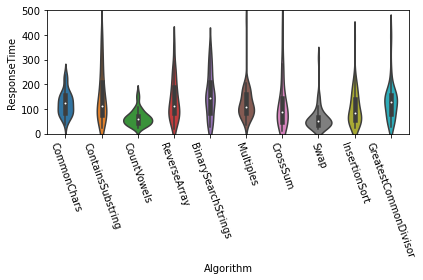

In [31]:
plt.ylim(0, 500)
ax = sns.violinplot(x="Algorithm", y="ResponseTime", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=290)

plt.tight_layout()
plt.savefig("results/behavioral/violin_of_all.pdf", bbox_inches='tight', pad_inches=0.01)

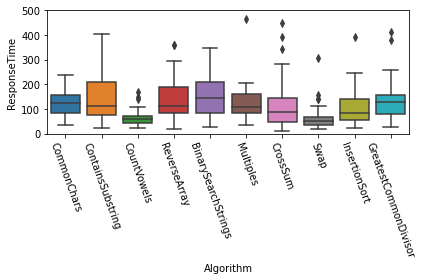

In [30]:
plt.ylim(0, 500)
ax = sns.boxplot(x="Algorithm", y="ResponseTime", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=290)

plt.tight_layout()
plt.savefig("results/behavioral/box_of_all.pdf", bbox_inches='tight', pad_inches=0.01)

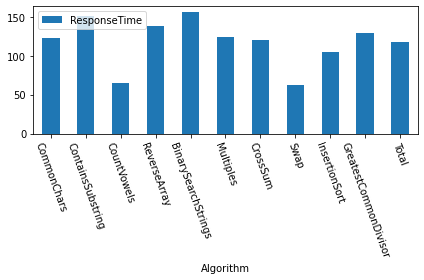

In [27]:
bar_df = pd.DataFrame([],columns=["ResponseTime", "Algorithm"])

algo_names = df["Algorithm"].unique()

for algo_name in algo_names:
    mean = float(df.loc[df["Algorithm"] == algo_name]["ResponseTime"].mean())
    
    bar_df = bar_df.append(pd.DataFrame([[mean, algo_name]], columns=["ResponseTime", "Algorithm"]))
    
bar_df = bar_df.append(pd.DataFrame([[float(df["ResponseTime"].mean()), "Total"]], columns=["ResponseTime", "Algorithm"]))

ax = bar_df.plot.bar(rot=290, x='Algorithm', y='ResponseTime')
plt.tight_layout()
ax.legend(loc="upper left")
plt.savefig("results/behavioral/bar_correctness_of_all.pdf", bbox_inches='tight', pad_inches=0.01)